Prepare rules for the all the data sets
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots

In [1]:
from google.colab import files
upload=files.upload()

Saving book.csv to book.csv


In [2]:
import pandas as pd
df=pd.read_csv("book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [4]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=bcdfa60df87a09422f682f3fcbd7271e7806d196ba8fa731bb05fa6a57b9a7d7
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [5]:
from apyori import apriori
rules=apriori(transactions=df,
              min_support=0.003,
              min_confidence=0.2,
              min_lift=3,
              min_length=2,
              max_length=2)
rules
report=list(rules)
report


[RelationRecord(items=frozenset({'C', 'd'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'d'}), confidence=0.33333333333333337, lift=3.666666666666667), OrderedStatistic(items_base=frozenset({'d'}), items_add=frozenset({'C'}), confidence=1.0, lift=3.666666666666667)]),
 RelationRecord(items=frozenset({'C', 'i'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'i'}), confidence=0.33333333333333337, lift=3.666666666666667), OrderedStatistic(items_base=frozenset({'i'}), items_add=frozenset({'C'}), confidence=1.0, lift=3.666666666666667)]),
 RelationRecord(items=frozenset({'Y', 'D'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'D'}), items_add=frozenset({'Y'}), confidence=1.0, lift=5.5), OrderedStatistic(items_base=frozenset({'Y'}), items_add=frozenset({'D'}), confidence=0.5, lift=5.5)]),
 RelationRecord(it

In [6]:
len(report)

23

In [7]:
report[0]

RelationRecord(items=frozenset({'C', 'd'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'d'}), confidence=0.33333333333333337, lift=3.666666666666667), OrderedStatistic(items_base=frozenset({'d'}), items_add=frozenset({'C'}), confidence=1.0, lift=3.666666666666667)])

In [8]:
report[0]

RelationRecord(items=frozenset({'C', 'd'}), support=0.09090909090909091, ordered_statistics=[OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'d'}), confidence=0.33333333333333337, lift=3.666666666666667), OrderedStatistic(items_base=frozenset({'d'}), items_add=frozenset({'C'}), confidence=1.0, lift=3.666666666666667)])

In [9]:
report[0][2][0][0] #1st order Base item

frozenset({'C'})

In [10]:
report[0][2][0][1] #1st order Add item

frozenset({'d'})

In [11]:
report[0][2][0][2] #1st order Confidence item

0.33333333333333337

In [12]:
report[0][2][0][3] #1st order Lift item

3.666666666666667

In [14]:
report[0][2][1][0] #2nd order Base item

frozenset({'d'})

In [15]:
report[0][2][1][1] #2nd order Add item

frozenset({'C'})

In [16]:
report[0][2][1][2] #2nd order Confidence item

1.0

In [17]:
report[0][2][1][3] #2nd order Lift item

3.666666666666667

In [18]:
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
h=[]
k=[]
for i in range(0,23):
  a.append(report[i][1]) # support
  b.append(report[i][2][0][0]) #1st order Base item
  c.append(report[i][2][0][1]) #1st order Add item
  d.append(report[i][2][0][2]) #1st order Confidence item
  e.append(report[i][2][0][3]) #1st order Lift item
  f.append(report[i][2][1][0]) #2st order Base item
  g.append(report[i][2][1][1]) #2st order Add item
  h.append(report[i][2][1][2]) #2st order Confidence item
  k.append(report[i][2][1][3]) #2st order Lift item

In [19]:
df["Support"]=pd.DataFrame(a)
df["1st_order_Base_item"]=pd.DataFrame(b)
df["1st_order_Add_item"]=pd.DataFrame(c)
df["1st_order_Confidence"]=pd.DataFrame(d)
df["1st_order_Lift"]=pd.DataFrame(e)
df["2st_order_Base_item"]=pd.DataFrame(f)
df["2st_order_Add_item"]=pd.DataFrame(g)
df["2st_order_Confidence"]=pd.DataFrame(h)
df["2st_order_Lift"]=pd.DataFrame(k)
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Support,1st_order_Base_item,1st_order_Add_item,1st_order_Confidence,1st_order_Lift,2st_order_Base_item,2st_order_Add_item,2st_order_Confidence,2st_order_Lift
0,0,1,0,1,0,0,1,0,0,0,0,0.090909,C,d,0.333333,3.666667,d,C,1.000000,3.666667
1,1,0,0,0,0,0,0,0,0,0,0,0.090909,C,i,0.333333,3.666667,i,C,1.000000,3.666667
2,0,0,0,0,0,0,0,0,0,0,0,0.090909,D,Y,1.000000,5.500000,Y,D,0.500000,5.500000
3,1,1,1,0,1,0,1,0,0,0,0,0.090909,F,c,1.000000,11.000000,c,F,1.000000,11.000000
4,0,0,1,0,0,0,1,0,0,0,0,0.090909,F,e,1.000000,3.666667,e,F,0.333333,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


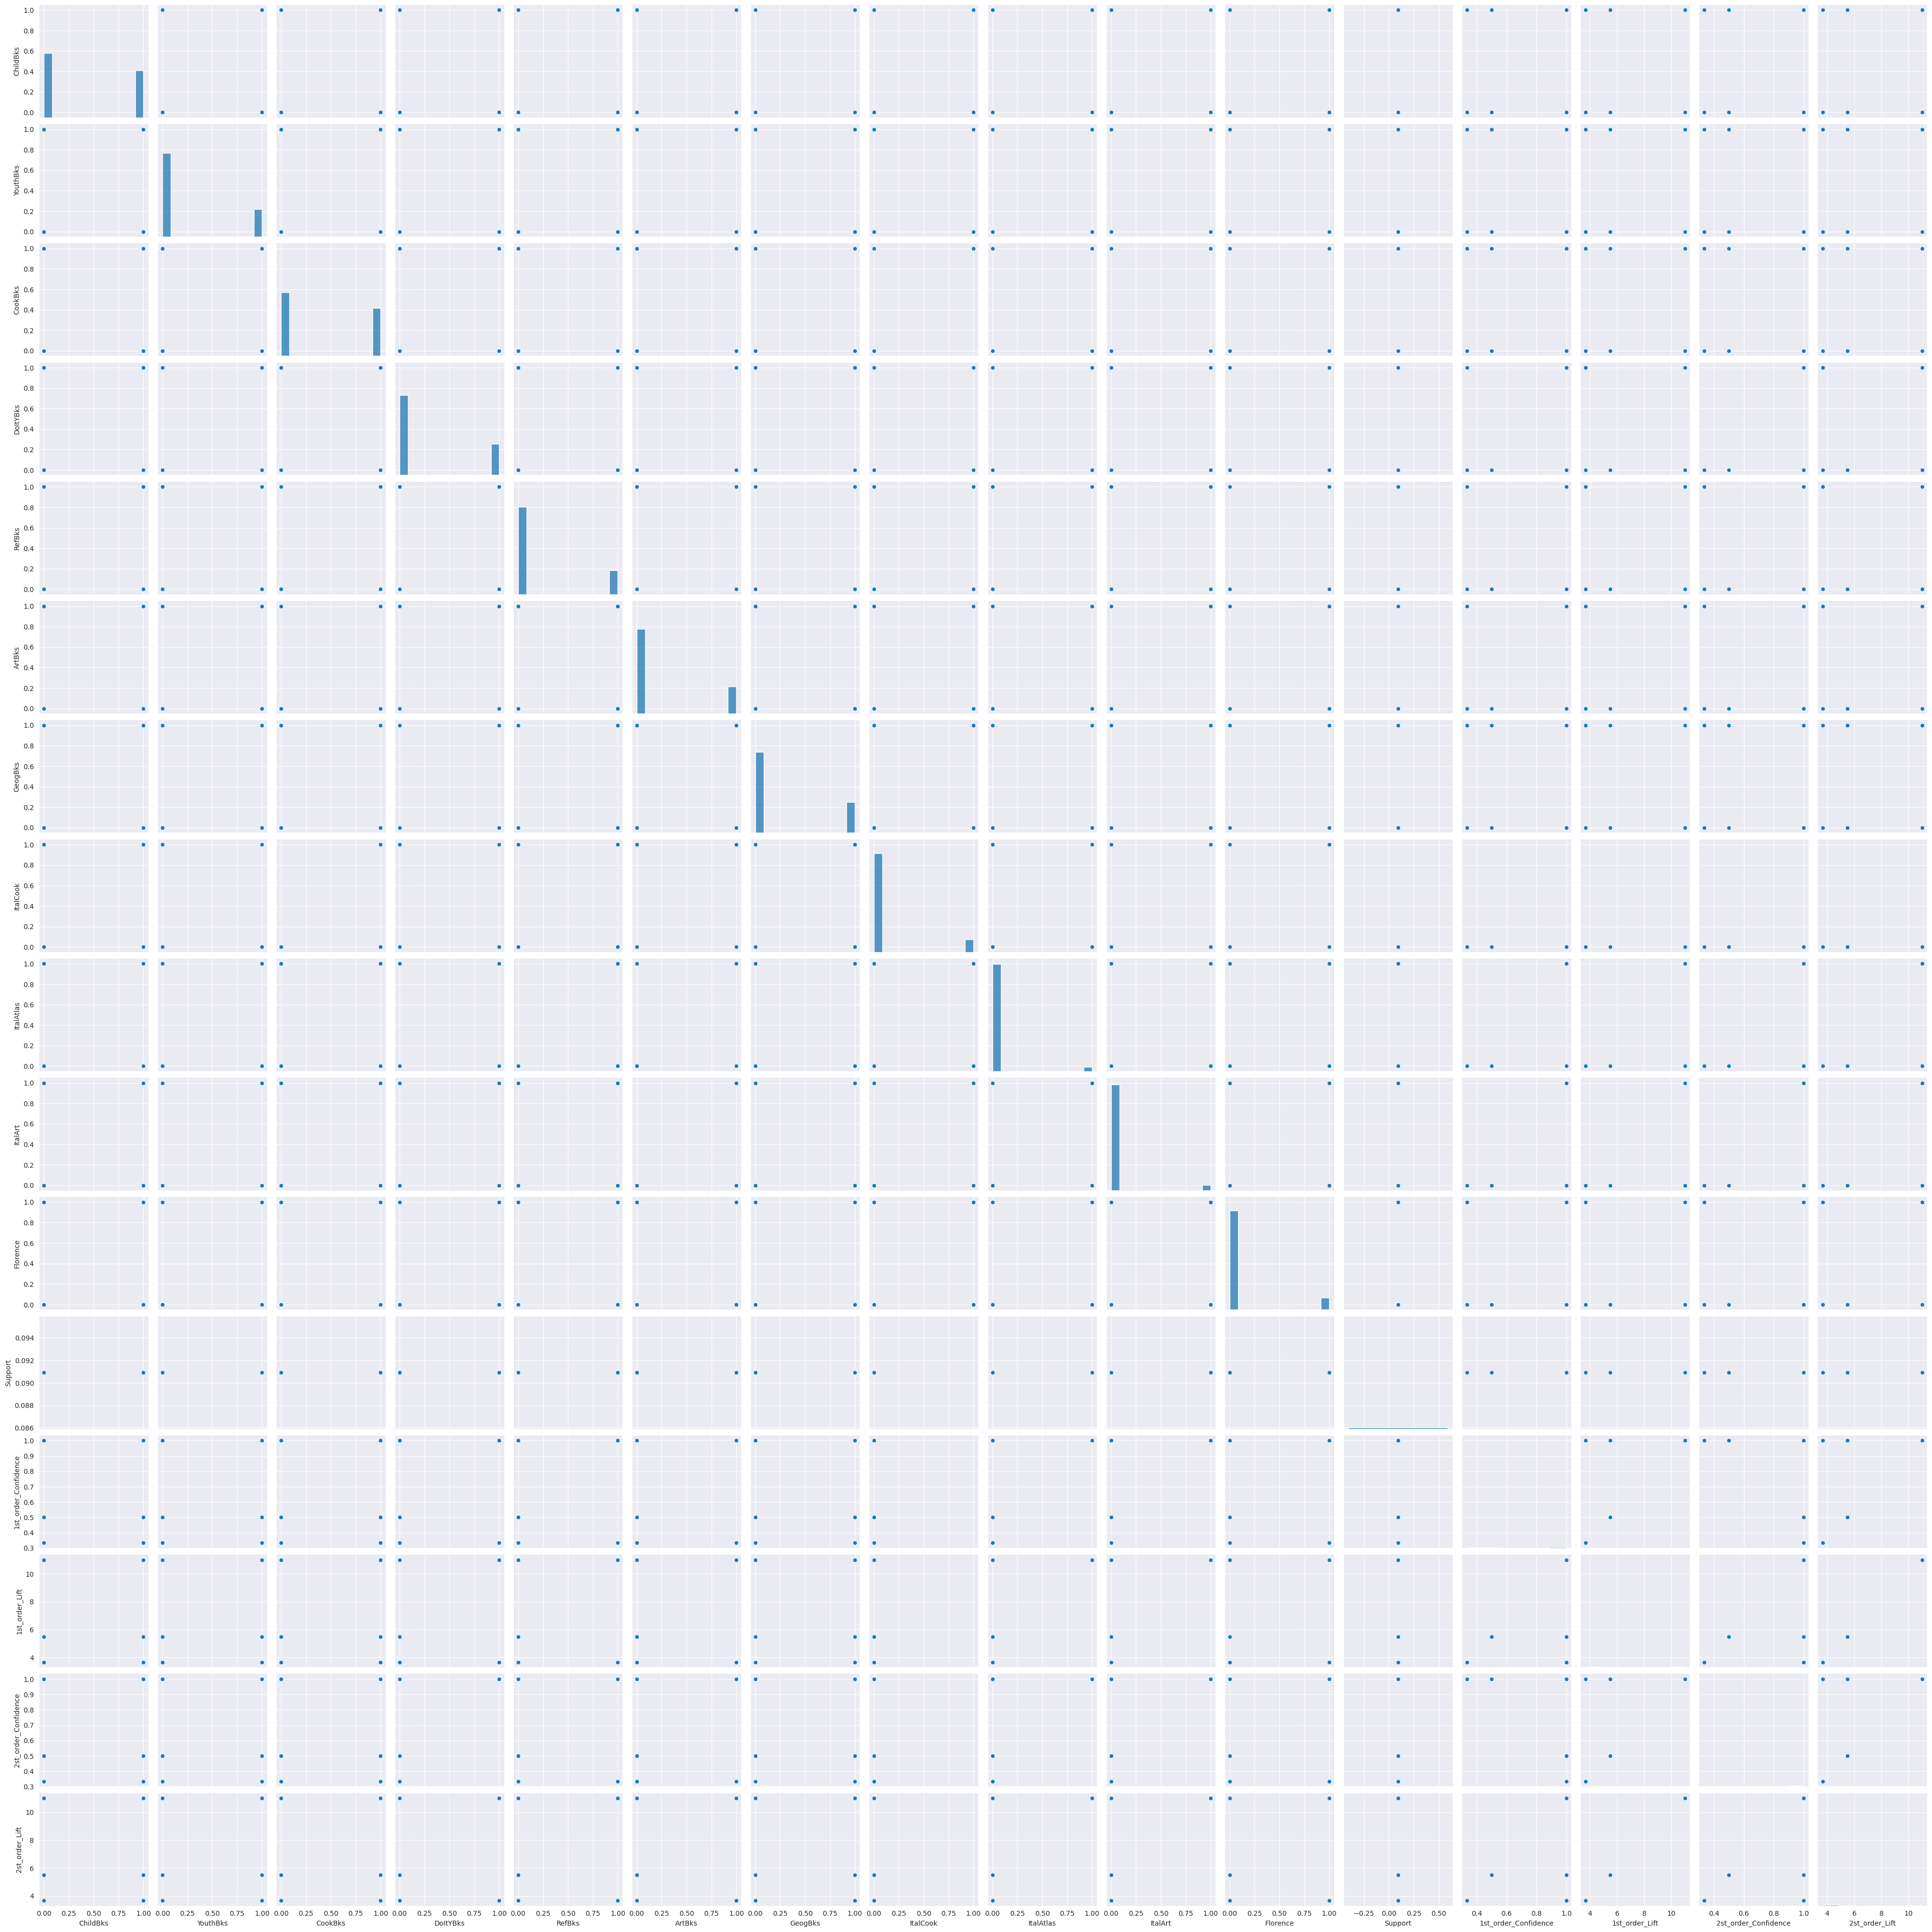

In [20]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

Association_Rules_For_Movies_Data_Set
Prepare rules for the all the data sets
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots

In [21]:
from google.colab import files
upload=files.upload()

Saving my_movies.csv to my_movies.csv


In [22]:
import pandas as pd
df=pd.read_csv("my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [23]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [24]:
len(df)

10

In [27]:
trans=[]
for i in range(0,10):
  trans.append([str(df.values[i,j]) for j in range(0,15)])
trans
!pip install apyori
from apyori import apriori
rules=apriori(transactions=trans,
              min_support=0.003,
              min_confidence=0.2,
              min_lift=3,
              min_length=2,
              max_lemgth=2)
rules
report=list(rules)
report

[RelationRecord(items=frozenset({'LOTR', 'Green Mile'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'Harry Potter1', 'Harry Potter2'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Harry Potter1'}), items_add=frozenset({'Harry Potter2'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'Harry Potter2'}), items_add=frozenset({'Harry Potter1'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'LOTR2', 'LOTR1'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LOTR1'}), items_add=frozenset({'LOTR2'}), confidence=1.0, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR2'}), items_add=frozenset({'LOTR1'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=

In [28]:
len(report)

112

In [29]:
report[0]

RelationRecord(items=frozenset({'LOTR', 'Green Mile'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)])

In [30]:
report[0][1] #support

0.1

In [31]:
report[0][2][0][0] #1st order Base item

frozenset({'Green Mile'})

In [32]:
report[0][2][0][1] #1st order Add item

frozenset({'LOTR'})

In [33]:
report[0][2][0][2] #1st order Confidence item

0.5

In [34]:
report[0][2][0][3] #1st order Lift item

5.0

In [35]:
report[0][2][1][0] #2nd order Base item

frozenset({'LOTR'})

In [36]:
report[0][2][1][1] #2nd order Add item

frozenset({'Green Mile'})

In [37]:
report[0][2][1][2] #2nd order Confidence item

1.0

In [38]:
report[0][2][1][3] #2nd order List item

5.0

In [39]:
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
h=[]
k=[]
for i in range(0,112):
  a.append(report[i][1]) # support
  b.append(report[i][2][0][0]) #1st order Base item
  c.append(report[i][2][0][1]) #1st order Add item
  d.append(report[i][2][0][2]) #1st order Confidence item
  e.append(report[i][2][0][3]) #1st order List item
  f.append(report[i][2][1][0]) #2nd order Base item
  g.append(report[i][2][1][1]) #2nd order Add item
  h.append(report[i][2][1][2]) #2nd order Confidence item
  k.append(report[i][2][1][3]) #2nd order List item


In [40]:
df["Support"]=pd.DataFrame(a)
df["1st_order_Base_item"]=pd.DataFrame(b)
df["1st_order_add_item"]=pd.Series(c)
df["1st_order_Confidence"]=pd.DataFrame(d)
df["1st_Lift"]=pd.DataFrame(e)
df["2nd_order_Base_item"]=pd.Series(f)
df["2nd_order_Add_item"]=pd.Series(g)
df["2nd_order_Confidence"]=pd.DataFrame(h)
df["2nd_order_Lift"]=pd.DataFrame(k)
df


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,...,Green Mile,Support,1st_order_Base_item,1st_order_add_item,1st_order_Confidence,1st_Lift,2nd_order_Base_item,2nd_order_Add_item,2nd_order_Confidence,2nd_order_Lift
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,...,1,0.1,Green Mile,(LOTR),0.5,5.0,(LOTR),(Green Mile),1.0,5.0
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,...,0,0.1,Harry Potter1,(Harry Potter2),0.5,5.0,(Harry Potter2),(Harry Potter1),1.0,5.0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,...,0,0.2,LOTR1,(LOTR2),1.0,5.0,(LOTR2),(LOTR1),1.0,5.0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0.1,Green Mile,"(0, LOTR)",0.5,5.0,(LOTR),"(0, Green Mile)",1.0,5.0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0.1,Harry Potter1,"(0, Harry Potter2)",0.5,5.0,(Harry Potter2),"(0, Harry Potter1)",1.0,5.0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0.2,LOTR1,"(0, LOTR2)",1.0,5.0,(LOTR2),"(0, LOTR1)",1.0,5.0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,...,0,0.1,Green Mile,"(LOTR, 1)",0.5,5.0,(LOTR),"(1, Green Mile)",1.0,5.0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,...,0,0.1,Harry Potter1,"(1, Harry Potter2)",0.5,5.0,(Harry Potter2),"(Harry Potter1, 1)",1.0,5.0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0.2,LOTR1,"(LOTR2, 1)",1.0,5.0,(LOTR2),"(1, LOTR1)",1.0,5.0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,...,1,0.1,Green Mile,"(Gladiator, LOTR)",0.5,5.0,(LOTR),"(Gladiator, Green Mile)",1.0,10.0


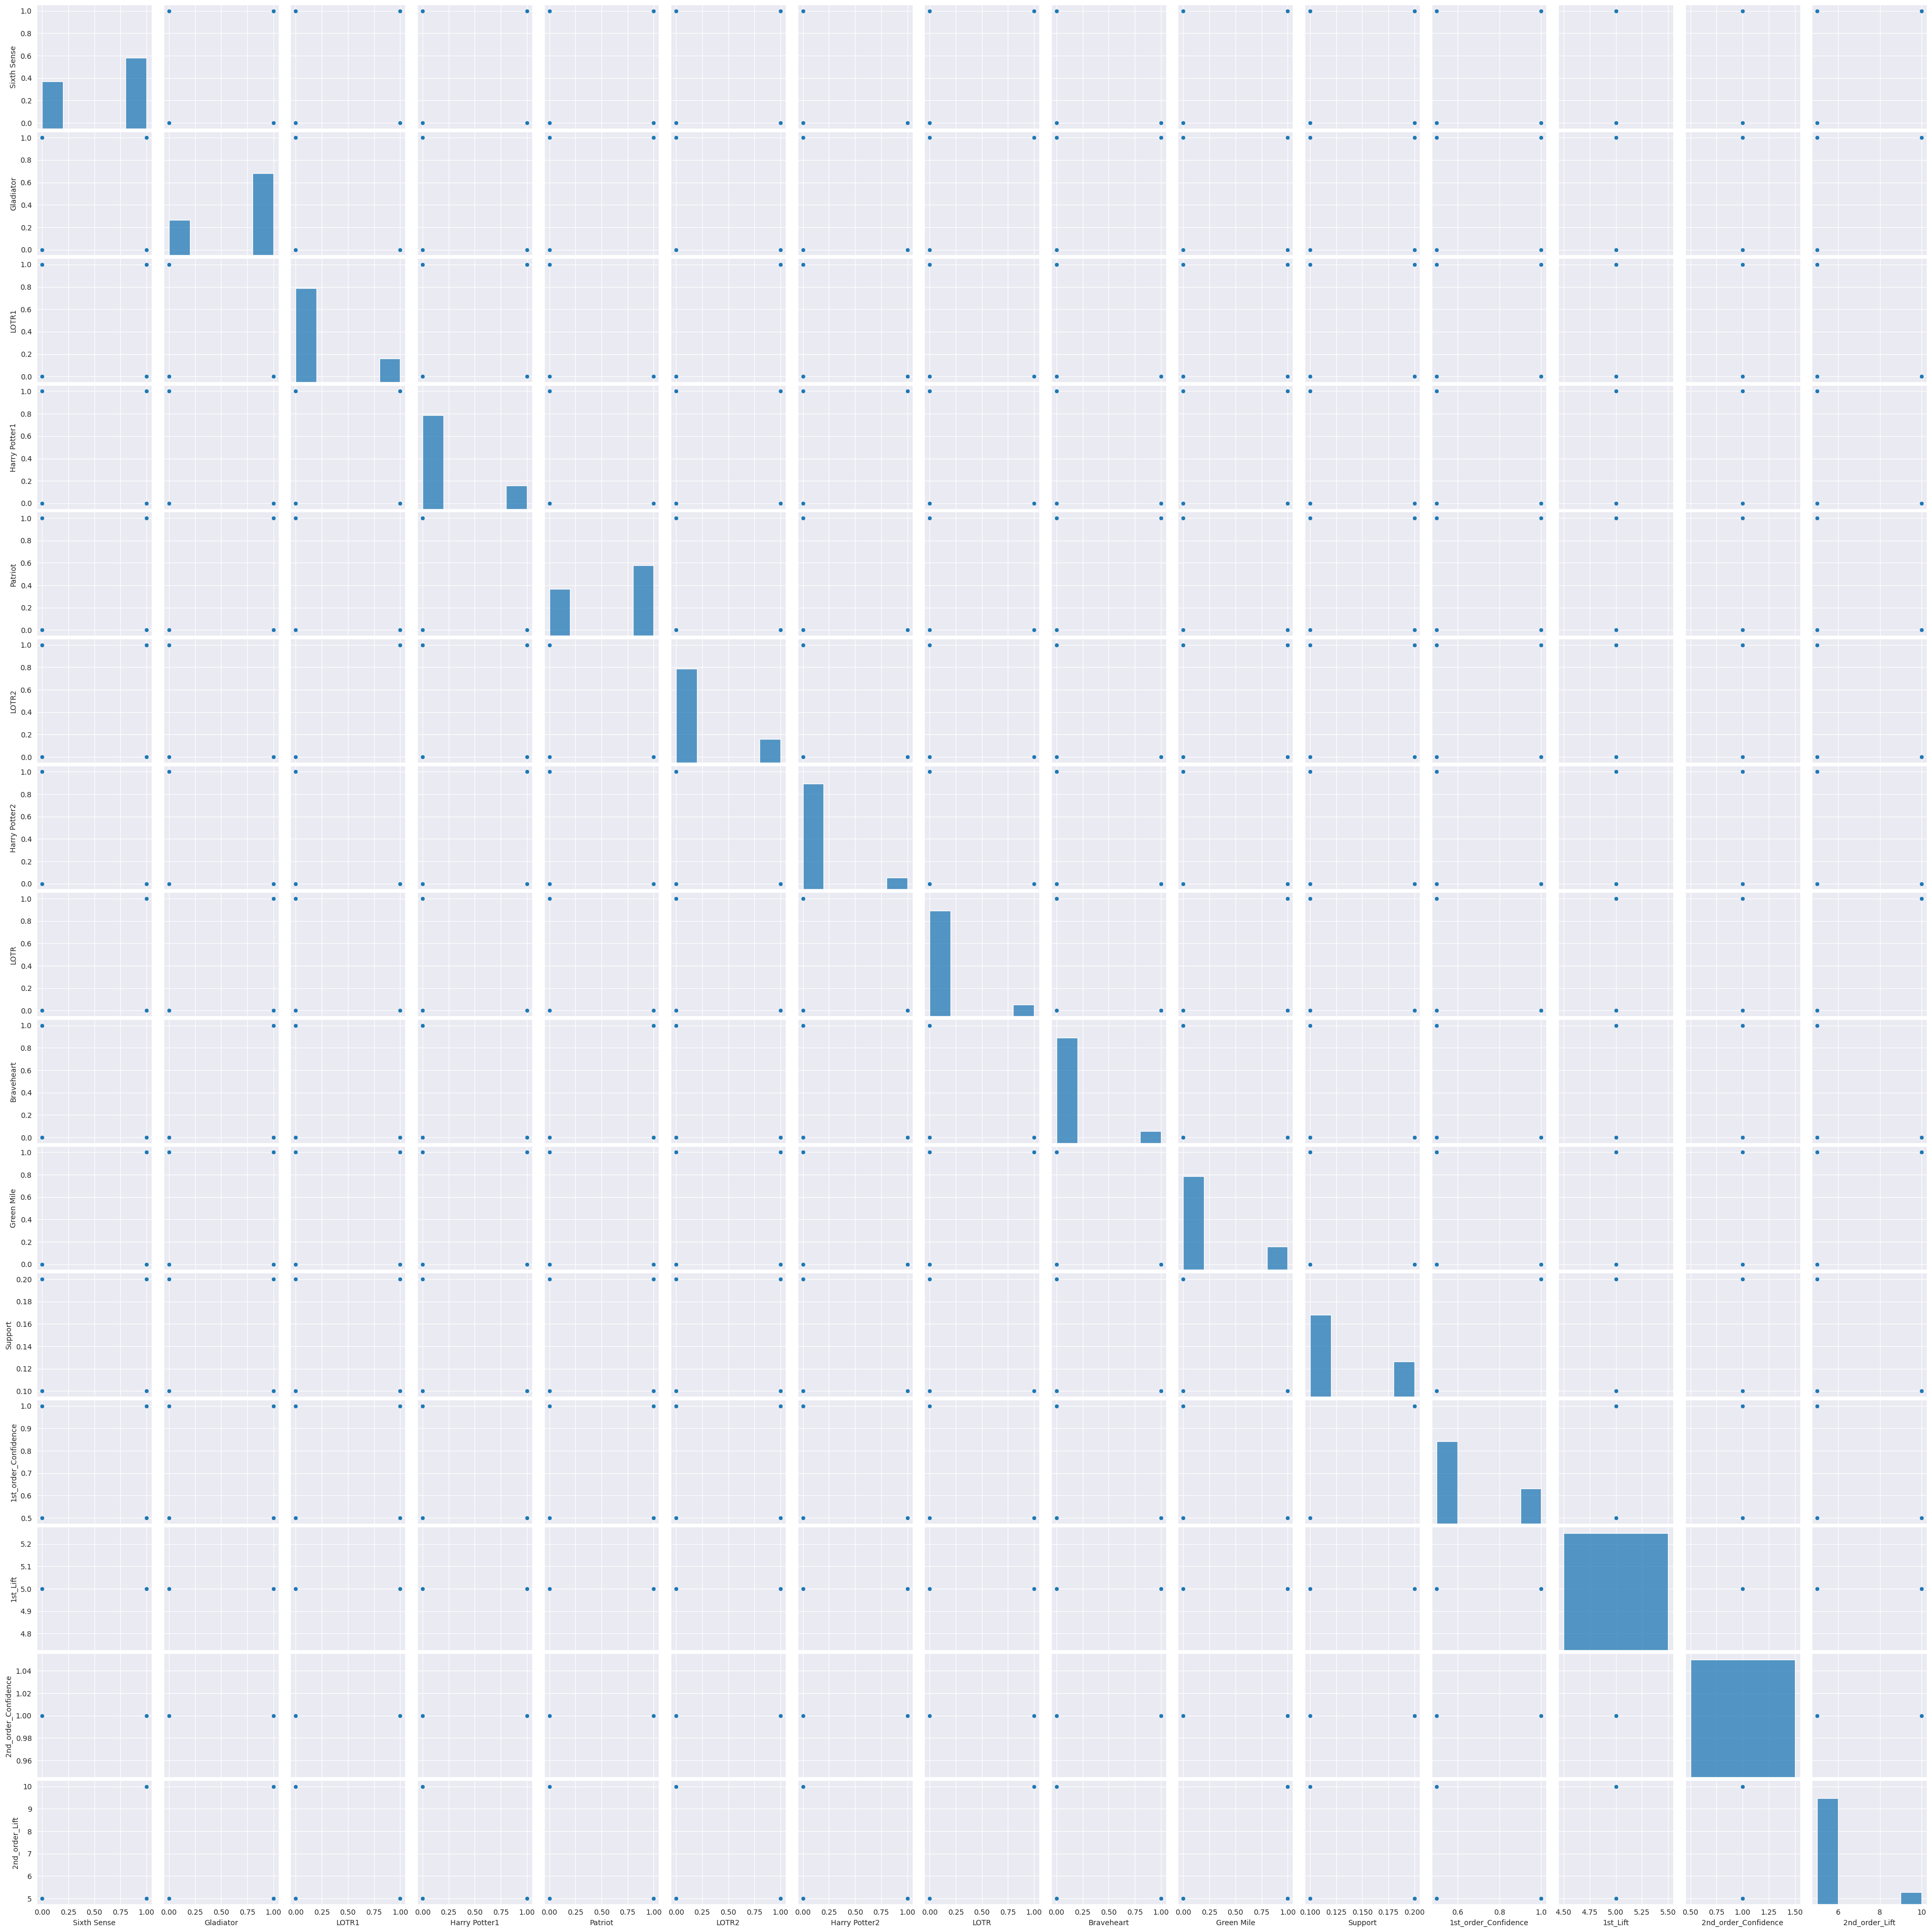

In [41]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)